## Trendet e blerjeve të konsumatorëve 
Kjo analizë eksploron dhe analizon tendencat e blerjeve të klientëve duke përdorur një grup të dhënash. Analiza ofron njohuri mbi sjelljen e konsumatorëve dhe modelet e blerjeve duke përfshirë detaje të tilla si mosha, gjinia, historiku i blerjeve, mënyrat e preferuara të pagesës dhe shpeshtësia e blerjeve.

### Libraritë e përdorura

In [122]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Leximi i dataset-it

In [137]:
df=pd.read_csv("../Shopping_Trends_Dataset.csv")

### Kualiteti i të dhënave 

- Struktura e bazës së të dhënave

In [108]:
# Për ta kuptuar strukturën e të dhënave tona përdorim funksionin .head() për të hedhur një vështrim në rreshtat e parë.
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19.0,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21.0,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45.0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


- Njohuri mbi llojet e të dhënave

In [29]:
# Për të fituar njohuri mbi llojet e të dhënave ekzekutojmë këtë komandë:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3951 non-null   int64  
 1   Age                     3948 non-null   float64
 2   Gender                  3950 non-null   object 
 3   Item Purchased          3951 non-null   object 
 4   Category                3950 non-null   object 
 5   Purchase Amount (USD)   3951 non-null   int64  
 6   Location                3951 non-null   object 
 7   Size                    3951 non-null   object 
 8   Color                   3951 non-null   object 
 9   Season                  3951 non-null   object 
 10  Review Rating           3951 non-null   float64
 11  Subscription Status     3951 non-null   object 
 12  Shipping Type           3951 non-null   object 
 13  Discount Applied        3951 non-null   object 
 14  Promo Code Used         3951 non-null   

- Kontrollimi i vlerave null

In [47]:
# Komanda për kontrollimin e vlerave null:
df.isnull().sum()

Customer ID               0
Age                       3
Gender                    1
Item Purchased            0
Category                  1
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

- Zevëndësimi i vlerave null

In [31]:
# Kalkulimi i moshës mesatare, duke mos i përfshirë vlerat NaN
average_age = df['Age'].mean()

# Zevëndësimi i vlerave NaN i kolonës Age me moshën mesatare
df['Age'].fillna(average_age, inplace=True)

# Shfaqja e dataseti-it të modifikuar
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    1
Item Purchased            0
Category                  1
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


- Kërkimi i duplikatëve

In [32]:
# Komanda për kërkimin e duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(df.duplicated().sum()))

Duplikatet: 40


- Largimi i duplikateve

In [33]:
# Fshirja e duplikateve
df.drop_duplicates(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 
                    'Purchase Amount (USD)', 'Location', 'Size', 'Color', 
                    'Season', 'Review Rating', 'Subscription Status', 
                    'Shipping Type', 'Discount Applied', 'Promo Code Used', 
                    'Previous Purchases', 'Payment Method', 'Frequency of Purchases'], 
                   keep='first', inplace=True)

# Kërkimi përsëri i duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(df.duplicated().sum()))

Duplikatet: 0


### Outliers

- Kërkimi i Outliers

<Axes: xlabel='Age'>

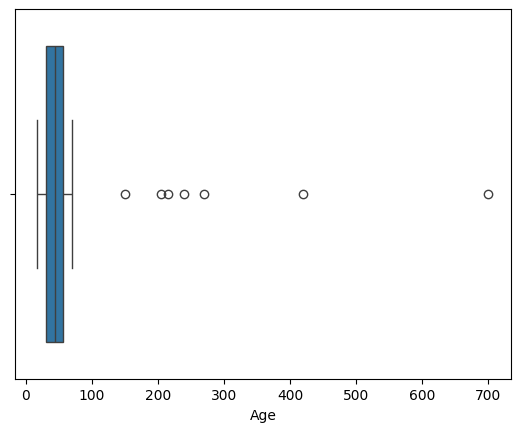

In [12]:
# Përdorimi i paketës seaborn për ti paraqitur Outliers
sns.boxplot(df['Age'], orient='h')


- Largimi i Outliers me metodën Z-Score

In [13]:
# Gjetja e limiteve
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
print('Limiti i sipërm:', upper_limit)
print('Limiti i poshtëm:', lower_limit)

Limiti i sipërm: 105.64132200602393
Limiti i poshtëm: -16.613459797310647


In [14]:
# Gjetja e Outliers
df.loc[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Sale Applied
3944,3900,150.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,No
3945,3900,240.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,No
3946,3900,420.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,No
3947,3900,215.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,No
3948,3900,205.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,No
3949,3900,270.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,No
3950,3900,700.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly,No


In [15]:
# Largimi i të dhënave që janë paraqitur si Outliers
new_df = df.loc[(df['Age'] <= upper_limit) & (df['Age'] >= lower_limit)]
print('Para largimit të Outliers:', len(df))
print('Pas largimit të Outliers:',len(new_df))
print('Outliers:', len(df)-len(new_df))

Para largimit të Outliers: 3951
Pas largimit të Outliers: 3941
Outliers: 10


- Paraqitja e dataset-it pa Outliers

<Axes: xlabel='Age'>

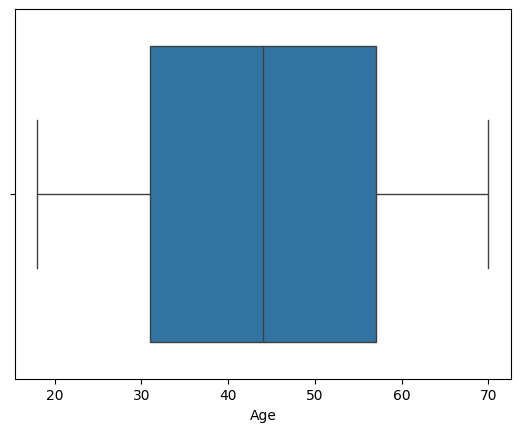

In [16]:
sns.boxplot(new_df['Age'], orient='h')

### Preprocesimi i të dhënave

- Reduktimi i dimensionalitetit

In [8]:
# Pasi qe kolonat: Discount Applied (Yes/No) dhe Promo Code Used (Yes/No) paraqesin aplikim të zbritjeve të produktit, 
# informacionin e të dy kolonave mund ta paraqesim në kolonën Sale Applied.

df['Sale Applied'] = df.apply(lambda row: 'Yes' if row['Discount Applied'] == 'Yes' or row['Promo Code Used'] == 'Yes' else 'No', axis=1)

### Noisy data

- Shtimi i zhurmës


In [131]:
# Shtimi i zhurmës në një kolonë numerike
np.random.seed(42)
# Shtimi i më shumë zhurmës në një kolonë numerike
kolona_zhurme = 'Purchase Amount (USD)'
df[kolona_zhurme] = df[kolona_zhurme] + np.random.normal(0, 20, size=len(df))

In [132]:
# Shfaqja e disa rreshtave të parë të datasetit me zhurmë
print("\nDataset me Zhurmë:")
print(df.head())


Dataset me Zhurmë:
   Customer ID   Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1  55.0   Male         Blouse  Clothing              62.934283   
1            2  19.0   Male        Sweater  Clothing              61.234714   
2            3  50.0   Male          Jeans  Clothing              85.953771   
3            4  21.0   Male        Sandals  Footwear             120.460597   
4            5  45.0   Male         Blouse  Clothing              44.316933   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Appl

- Vizualizimi i datasetit me zhurmë


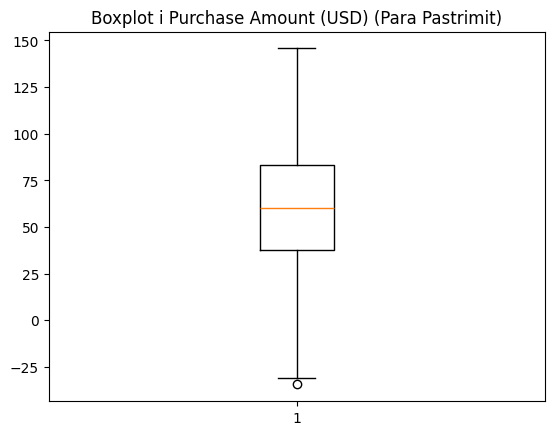

In [133]:
# Vizualizimi i datasetit me zhurmë (Para Pastrimit)
plt.boxplot(df[kolona_zhurme])
plt.title(f'Boxplot i {kolona_zhurme} (Para Pastrimit)')
plt.show()


- Trajtimi i  zhurmës bazuar në metodën IQR



In [134]:
# Heqja e outliers bazuar në shtrirjen e kuadrit (IQR)
Q1 = df[kolona_zhurme].quantile(0.25)
Q3 = df[kolona_zhurme].quantile(0.75)
IQR = Q3 - Q1
limiti_i_ulët = Q1 - 1.5 * IQR
limiti_i_lartë = Q3 + 1.5 * IQR

In [135]:
df_pastruar = df[(df[kolona_zhurme] >= limiti_i_ulët) & (df[kolona_zhurme] <= limiti_i_lartë)]

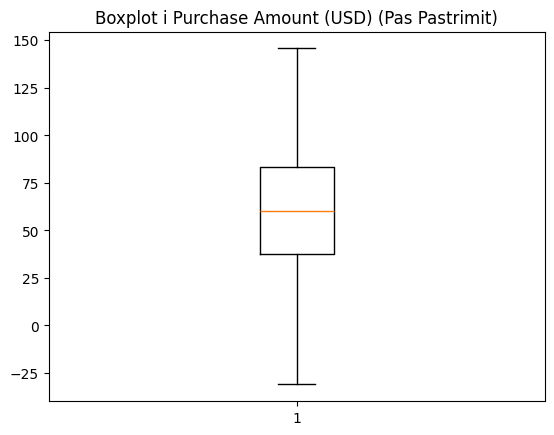

In [136]:
# Vizualizimi i datasetit te pastruar me zhurmë
plt.boxplot(df_pastruar[kolona_zhurme])
plt.title(f'Boxplot i {kolona_zhurme} (Pas Pastrimit)')
plt.show()

- 

In [147]:
# Funksioni për shtimin e zhurmës në kolonën "Category"
def shto_zhurme_kategori(list_zhurme):
    zhurma = np.random.choice(list_zhurme, size=len(df))
    df['Category'] = df['Category'] + zhurma

In [148]:
# Lista e vlerave të mundshme për zhurmë në kolonën "Category"
lista_zhurme_kategori = ["", "", "", "Speciale ", "Edicion i Kufizuar ", "Ekskluzive "]

In [149]:
# Shtimi i zhurmës në kolonën "Category"
shto_zhurme_kategori(lista_zhurme_kategori)

In [150]:
# Shfaq datasetin me zhurmë
print("\nDataset me Zhurmë:")
print(df)


Dataset me Zhurmë:
      Customer ID    Age  Gender Item Purchased              Category  \
0               1   55.0    Male         Blouse              Clothing   
1               2   19.0    Male        Sweater              Clothing   
2               3   50.0    Male          Jeans              Clothing   
3               4   21.0    Male        Sandals   FootwearEkskluzive    
4               5   45.0    Male         Blouse   ClothingEkskluzive    
...           ...    ...     ...            ...                   ...   
3946         3900  420.0  Female        Handbag           Accessories   
3947         3900  215.0  Female        Handbag           Accessories   
3948         3900  205.0  Female        Handbag  AccessoriesSpeciale    
3949         3900  270.0  Female        Handbag           Accessories   
3950         3900  700.0  Female        Handbag           Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53      

<Figure size 1000x600 with 0 Axes>

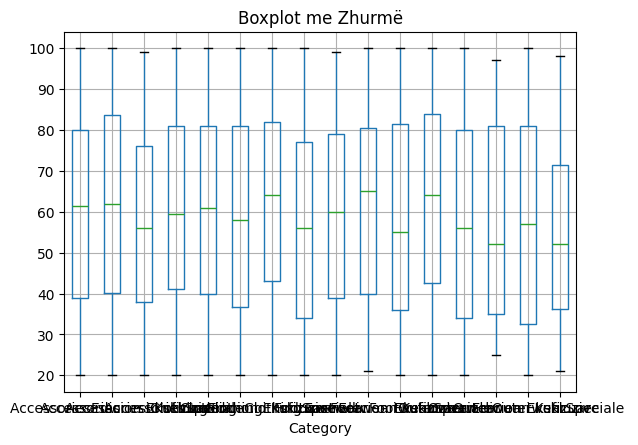

In [151]:
# Shfaq boxplotin me zhurmë
plt.figure(figsize=(10, 6))
df.boxplot(column='Purchase Amount (USD)', by='Category', showfliers=False)
plt.title('Boxplot me Zhurmë')
plt.suptitle('')
plt.show()

In [152]:
# Hiqe të dhënat me zhurmë
df['Category'] = df['Category'].str.replace('|'.join(lista_zhurme_kategori), '', regex=True)
df = df[df['Category'] != '']  # Hiqe rreshtat ku 'Category' është e zbrazët

In [153]:
# Shfaq datasetin pa zhurmë
print("\nDataset pa Zhurmë:")
print(df)


Dataset pa Zhurmë:
      Customer ID    Age  Gender Item Purchased     Category  \
0               1   55.0    Male         Blouse     Clothing   
1               2   19.0    Male        Sweater     Clothing   
2               3   50.0    Male          Jeans     Clothing   
3               4   21.0    Male        Sandals     Footwear   
4               5   45.0    Male         Blouse     Clothing   
...           ...    ...     ...            ...          ...   
3946         3900  420.0  Female        Handbag  Accessories   
3947         3900  215.0  Female        Handbag  Accessories   
3948         3900  205.0  Female        Handbag  Accessories   
3949         3900  270.0  Female        Handbag  Accessories   
3950         3900  700.0  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2

<Figure size 1000x600 with 0 Axes>

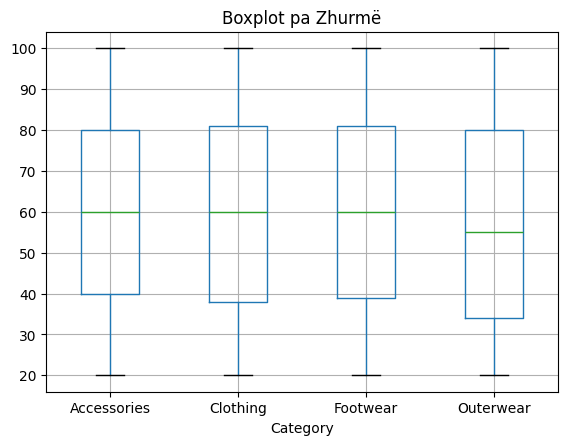

In [154]:
# Shfaq boxplotin pa zhurmë
plt.figure(figsize=(10, 6))
df.boxplot(column='Purchase Amount (USD)', by='Category', showfliers=False)
plt.title('Boxplot pa Zhurmë')
plt.suptitle('')
plt.show()